In [104]:
import ROOT
import glob
import uproot
import awkward as ak
import time
import matplotlib.pyplot as plt
import vector
import hist
import numpy as np
import mplhep as hep


# Lista de diretórios com arquivos ROOT
diretorios = [
    "/opendata/eos/opendata/cms/Run2016G/DoubleEG/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/100000/*.root:Events",
    "/opendata/eos/opendata/cms/Run2016G/DoubleEG/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/1010000/*.root:Events",
    "/opendata/eos/opendata/cms/Run2016G/DoubleEG/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/250000/*.root:Events"
]

# Lista com as variáveis que queremos carregar
variaveis = [
    "nElectron",
    "Electron_pt",
    "Electron_eta",
    "Electron_phi",
    "Electron_mass",
    "Electron_charge"
]

# Concatenar as variáveis da árvore "Events" de todos os arquivos nos diretórios
arrays = uproot.concatenate(diretorios, filter_name=variaveis)

# Separar os arrays carregados
nElectron = arrays["nElectron"]
eletron_pt = arrays["Electron_pt"]
eletron_eta = arrays["Electron_eta"]
eletron_phi = arrays["Electron_phi"]
eletron_mass = arrays["Electron_mass"]
eletron_charge = arrays["Electron_charge"]

# Verificar o tamanho dos arrays
print(f"Total de eventos: {len(nElectron)}")

Total de eventos: 78797031


In [105]:
mask_di_eletron = nElectron == 2

eletron_p4 = vector.zip({'pt': eletron_pt,
                      'eta': eletron_eta,
                      'phi': eletron_phi,
                      'mass': eletron_mass})
two_eletron_p4 = eletron_p4[mask_di_eletron]

two_eletron_charges = eletron_charge[mask_di_eletron]
opposite_sign_eletron_mask = two_eletron_charges[:, 0] != two_eletron_charges[:, 1]
two_eletron_p4 = two_eletron_p4[opposite_sign_eletron_mask]
two_eletron_p4

<MomentumArray4D [[{rho: 40.5, phi: ..., ...}, ...], ...] type='14253650 * ...'>

In [106]:
first_eletron_p4 = two_eletron_p4[:, 0]
second_eletron_p4 = two_eletron_p4[:, 1]
di_eletron_p4 = first_eletron_p4 + second_eletron_p4
di_eletron_p4

<MomentumArray4D [{rho: 1.96, phi: 0.409, ...}, ...] type='14253650 * Momen...'>

Total events: 5248323


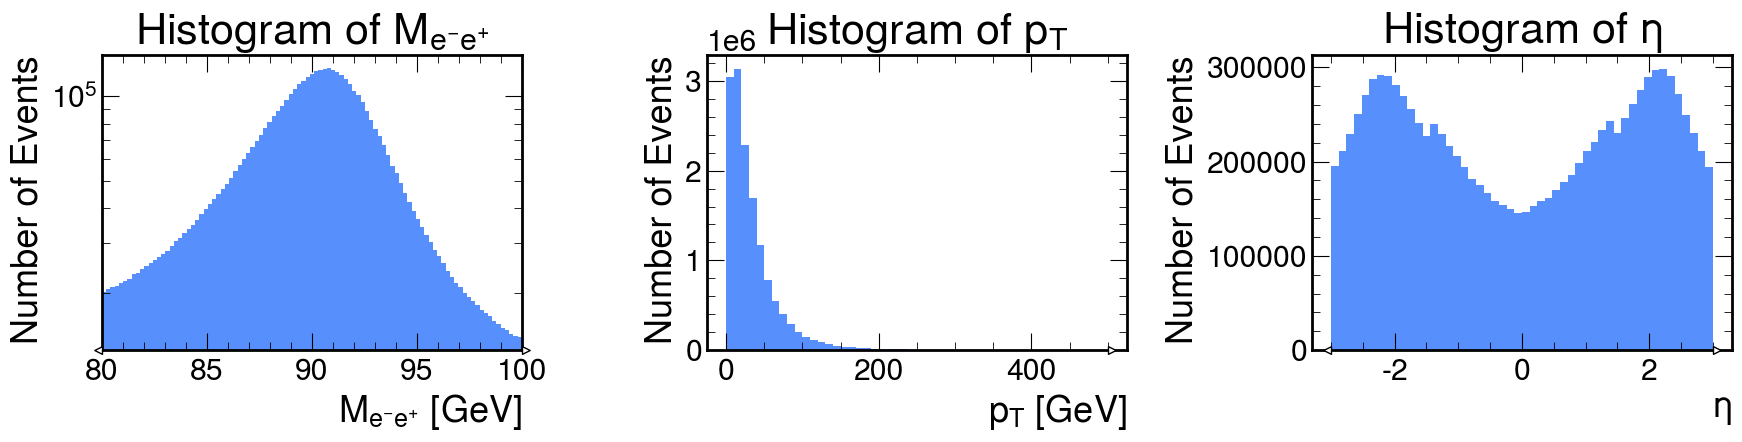

<Figure size 1000x1000 with 0 Axes>

In [107]:
import numpy as np
import hist
import mplhep as hep
import matplotlib.pyplot as plt

# Exemplo de dados das variáveis
# Substitua pelos valores reais de sum_eletron_p4.pt, sum_eletron_p4.eta, sum_eletron_p4.mass
pt = di_eletron_p4.pt
eta = di_eletron_p4.eta
mass = di_eletron_p4.mass

# Definindo os bins
bins = np.linspace(80, 100, 100)

# Criando o histograma de massa invariante
di_eletron_mass_hist = hist.Hist(hist.axis.Variable(bins, label=r'$M_{e^{-}e^{+}}$ [GeV]'))
di_eletron_mass_hist.fill(mass)

# Criando o histograma de pt
pt_hist = hist.Hist(hist.axis.Regular(50, 0, 500, label=r'$p_T$ [GeV]'))
pt_hist.fill(pt)

# Criando o histograma de eta
eta_hist = hist.Hist(hist.axis.Regular(50, -3, 3, label=r'$\eta$'))
eta_hist.fill(eta)

# Estilo CMS
hep.style.use('CMS')

# Plotando a massa invariante
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Massa invariante
hep.histplot(di_eletron_mass_hist, histtype='fill', ax=axs[0])
axs[0].set_title(r"Histogram of $M_{e^{-}e^{+}}$")
axs[0].set_xlabel(r"$M_{e^{-}e^{+}}$ [GeV]")
axs[0].set_ylabel("Number of Events")
axs[0].set_xlim(80, 100)
axs[0].set_yscale('log')

# pt
hep.histplot(pt_hist, histtype='fill', ax=axs[1])
axs[1].set_title(r"Histogram of $p_T$")
axs[1].set_xlabel(r"$p_T$ [GeV]")
axs[1].set_ylabel("Number of Events")
#axs[1].set_yscale('log')

# eta
hep.histplot(eta_hist, histtype='fill', ax=axs[2])
axs[2].set_title(r"Histogram of $\eta$")
axs[2].set_xlabel(r"$\eta$")
axs[2].set_ylabel("Number of Events")
#axs[2].set_yscale('log')


# Total de eventos
total_events = int(di_eletron_mass_hist.sum())
print(f"Total events: {total_events}")

# Ajustando o layout e mostrando o gráfico
plt.tight_layout()
plt.show()
plt.savefig('histogram_1.png')


# Fazendo os corte de pT eta 

In [108]:
cut_pt_1 = first_eletron_p4.pt > 20
cut_pt_2 = second_eletron_p4.pt > 20

cut_eta_1 = first_eletron_p4.eta < np.abs(2.4)
cut_eta_2 = second_eletron_p4.eta < np.abs(2.4)

final_cut = cut_pt_1 & cut_pt_2 & cut_eta_1 & cut_eta_2

two_eletron_p4_cut = two_eletron_p4[final_cut_pt]

In [109]:
two_eletron_p4_cut

first_eletron_p4 = two_eletron_p4_cut[:,0]
second_eletron_p4 = two_eletron_p4_cut[:,1]
di_eletron_p4_cut = first_eletron_p4 + second_eletron_p4

Total events: 3193266


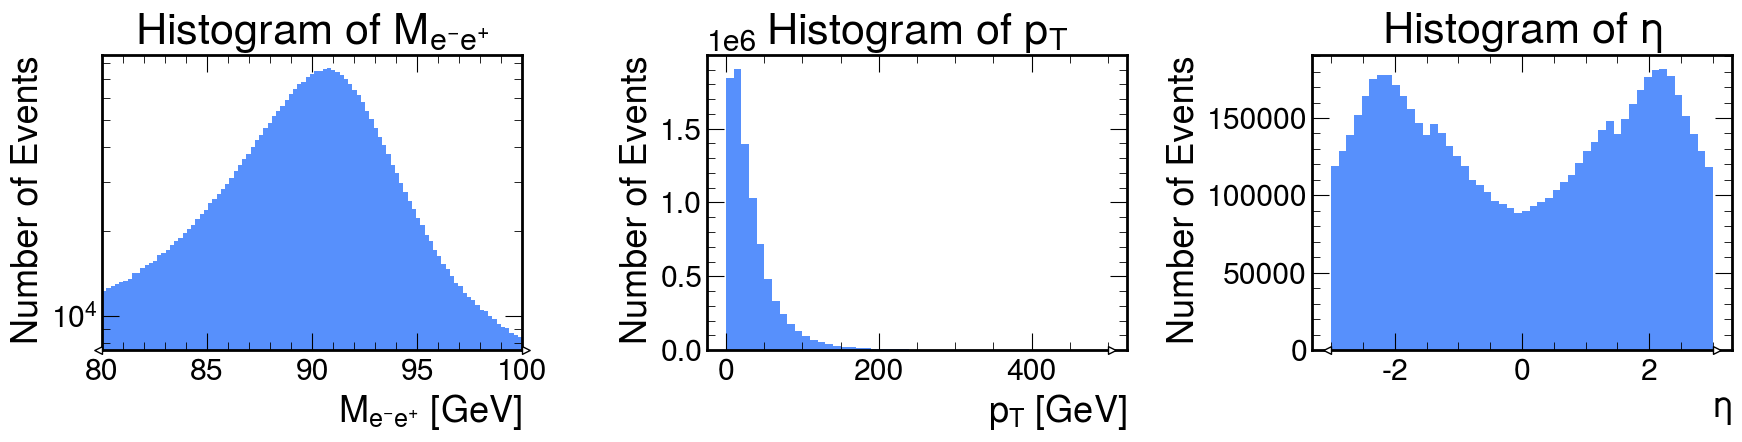

<Figure size 1000x1000 with 0 Axes>

In [110]:
import numpy as np
import hist
import mplhep as hep
import matplotlib.pyplot as plt

# Exemplo de dados das variáveis
# Substitua pelos valores reais de sum_eletron_p4.pt, sum_eletron_p4.eta, sum_eletron_p4.mass
pt = di_eletron_p4_cut.pt
eta = di_eletron_p4_cut.eta
mass = di_eletron_p4_cut.mass

# Definindo os bins
bins = np.linspace(80, 100, 100)

# Criando o histograma de massa invariante
di_eletron_mass_hist = hist.Hist(hist.axis.Variable(bins, label=r'$M_{e^{-}e^{+}}$ [GeV]'))
di_eletron_mass_hist.fill(mass)

# Criando o histograma de pt
pt_hist = hist.Hist(hist.axis.Regular(50, 0, 500, label=r'$p_T$ [GeV]'))
pt_hist.fill(pt)

# Criando o histograma de eta
eta_hist = hist.Hist(hist.axis.Regular(50, -3, 3, label=r'$\eta$'))
eta_hist.fill(eta)

# Estilo CMS
hep.style.use('CMS')

# Plotando a massa invariante
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Massa invariante
hep.histplot(di_eletron_mass_hist, histtype='fill', ax=axs[0])
axs[0].set_title(r"Histogram of $M_{e^{-}e^{+}}$")
axs[0].set_xlabel(r"$M_{e^{-}e^{+}}$ [GeV]")
axs[0].set_ylabel("Number of Events")
axs[0].set_xlim(80, 100)
axs[0].set_yscale('log')

# pt
hep.histplot(pt_hist, histtype='fill', ax=axs[1])
axs[1].set_title(r"Histogram of $p_T$")
axs[1].set_xlabel(r"$p_T$ [GeV]")
axs[1].set_ylabel("Number of Events")
#axs[1].set_yscale('log')

# eta
hep.histplot(eta_hist, histtype='fill', ax=axs[2])
axs[2].set_title(r"Histogram of $\eta$")
axs[2].set_xlabel(r"$\eta$")
axs[2].set_ylabel("Number of Events")
#axs[2].set_yscale('log')


# Total de eventos
total_events = int(di_eletron_mass_hist.sum())
print(f"Total events: {total_events}")

# Ajustando o layout e mostrando o gráfico
plt.tight_layout()
plt.show()
plt.savefig('histogram_2.png')


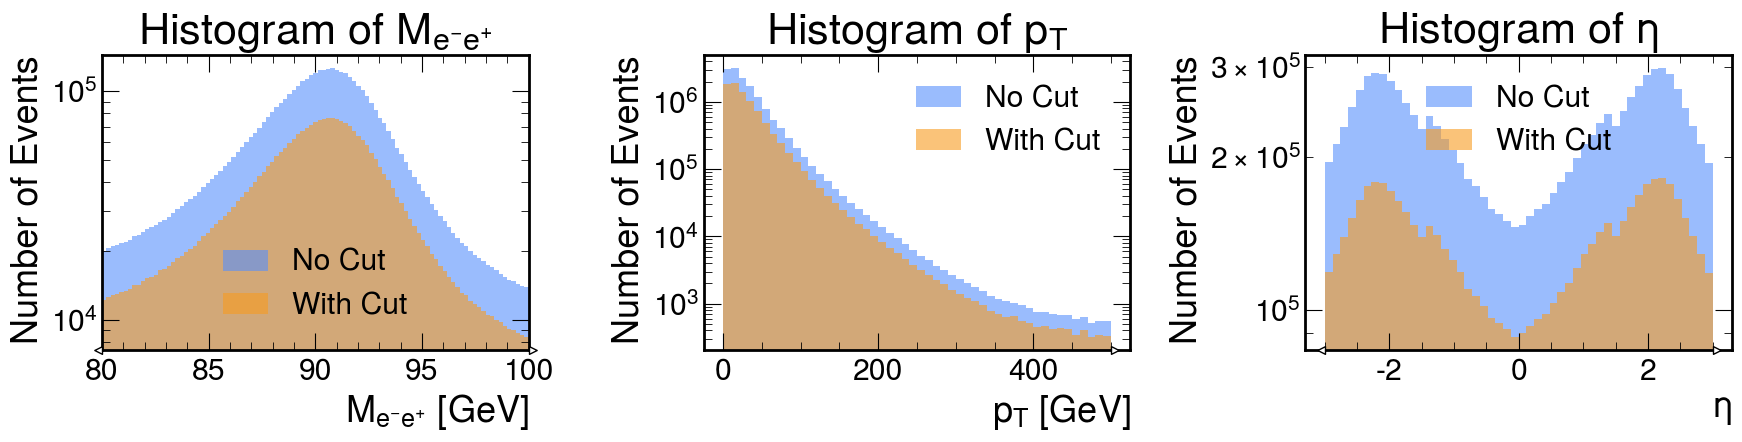

Total events (no cut): 5248323
Total events (with cut): 3193266


<Figure size 1000x1000 with 0 Axes>

In [111]:
import numpy as np
import hist
import mplhep as hep
import matplotlib.pyplot as plt

# Exemplo de dados das variáveis
# Substitua pelos valores reais de sum_eletron_p4.pt, sum_eletron_p4.eta, sum_eletron_p4.mass
pt_no_cut = di_eletron_p4.pt
eta_no_cut = di_eletron_p4.eta
mass_no_cut = di_eletron_p4.mass

pt_cut = di_eletron_p4_cut.pt
eta_cut = di_eletron_p4_cut.eta
mass_cut = di_eletron_p4_cut.mass

# Definindo os bins
bins = np.linspace(80, 100, 100)

# Criando os histogramas de massa invariante
di_eletron_mass_hist_no_cut = hist.Hist(hist.axis.Variable(bins, label=r'$M_{e^{-}e^{+}}$ [GeV]'))
di_eletron_mass_hist_no_cut.fill(mass_no_cut)

di_eletron_mass_hist_cut = hist.Hist(hist.axis.Variable(bins, label=r'$M_{e^{-}e^{+}}$ [GeV]'))
di_eletron_mass_hist_cut.fill(mass_cut)

# Criando os histogramas de pt
pt_hist_no_cut = hist.Hist(hist.axis.Regular(50, 0, 500, label=r'$p_T$ [GeV]'))
pt_hist_no_cut.fill(pt_no_cut)

pt_hist_cut = hist.Hist(hist.axis.Regular(50, 0, 500, label=r'$p_T$ [GeV]'))
pt_hist_cut.fill(pt_cut)

# Criando os histogramas de eta
eta_hist_no_cut = hist.Hist(hist.axis.Regular(50, -3, 3, label=r'$\eta$'))
eta_hist_no_cut.fill(eta_no_cut)

eta_hist_cut = hist.Hist(hist.axis.Regular(50, -3, 3, label=r'$\eta$'))
eta_hist_cut.fill(eta_cut)

# Estilo CMS
hep.style.use('CMS')

# Plotando os histogramas comparativos
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Massa invariante (com e sem corte)
hep.histplot([di_eletron_mass_hist_no_cut, di_eletron_mass_hist_cut], histtype='fill', ax=axs[0], label=['No Cut', 'With Cut'], alpha=0.6)
axs[0].set_title(r"Histogram of $M_{e^{-}e^{+}}$")
axs[0].set_xlabel(r"$M_{e^{-}e^{+}}$ [GeV]")
axs[0].set_ylabel("Number of Events")
axs[0].set_xlim(80, 100)
axs[0].set_yscale('log')
axs[0].legend()

# pt (com e sem corte)
hep.histplot([pt_hist_no_cut, pt_hist_cut], histtype='fill', ax=axs[1], label=['No Cut', 'With Cut'], alpha=0.6)
axs[1].set_title(r"Histogram of $p_T$")
axs[1].set_xlabel(r"$p_T$ [GeV]")
axs[1].set_ylabel("Number of Events")
axs[1].set_yscale('log')
axs[1].legend()

# eta (com e sem corte)
hep.histplot([eta_hist_no_cut, eta_hist_cut], histtype='fill', ax=axs[2], label=['No Cut', 'With Cut'], alpha=0.6)
axs[2].set_title(r"Histogram of $\eta$")
axs[2].set_xlabel(r"$\eta$")
axs[2].set_ylabel("Number of Events")
axs[2].set_yscale('log')
axs[2].legend()

# Ajustando o layout e mostrando o gráfico
plt.tight_layout()
plt.show()
plt.savefig('histogram_comparacao.png')


# Total de eventos
total_events_no_cut = int(di_eletron_mass_hist_no_cut.sum())
total_events_cut = int(di_eletron_mass_hist_cut.sum())

print(f"Total events (no cut): {total_events_no_cut}")
print(f"Total events (with cut): {total_events_cut}")
